In [46]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
df = pd.read_csv('../csv-archivos/datos_sql.csv', index_col=0)
df

,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,...,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_current_manager,date_birth,remote_work,grupo
0,False,NaN,684.0,NaN,6,3,NaN,162.0,1.0,m,...,0,NaN,5,3.0,20,15,15,1972,True,control
1,False,NaN,699.0,NaN,1,4,life sciences,259.0,3.0,m,...,1,34.0,5,3.0,33,11,9,1971,True,control
2,False,rarely,532.0,research & development,4,2,technical degree,319.0,3.0,m,...,0,22.0,3,NaN,22,11,15,1981,True,control
3,False,rarely,359.0,NaN,2,4,medical,NaN,1.0,f,...,2,NaN,2,NaN,20,5,6,1976,False,control
4,False,NaN,1319.0,NaN,3,3,technical degree,NaN,1.0,f,...,1,NaN,5,3.0,19,2,8,1977,False,variante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,False,NaN,498.0,NaN,3,4,medical,966.0,3.0,f,...,1,8.0,2,4.0,8,6,3,1991,True,variante
1610,False,no,805.0,NaN,4,2,NaN,972.0,3.0,m,...,0,NaN,5,2.0,9,0,8,1978,True,variante
1611,False,rarely,903.0,NaN,13,5,NaN,NaN,NaN,m,...,0,9.0,3,3.0,8,0,7,1984,True,control
1612,False,no,1229.0,NaN,8,4,technical degree,990.0,1.0,m,...,2,12.0,3,3.0,7,0,7,1987,NaN,control


In [7]:
def eda (dataframe):
    "Esta función hace un análisis exploratorio del dataframe que le pasemos"

    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head()) 

    return   

In [8]:
eda(df)

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
business_travel,47.688410
daily_rate,7.789740
department,81.317289
education_field,46.421786
employee_number,26.535782
environment_satisfaction,6.333122
hourly_rate,5.319823
marital_status,40.531982
monthly_income,52.311590
over_time,41.925269



 ..................... 

Los tipos de las columnas son:


,tipo_dato
attrition,bool
business_travel,object
daily_rate,float64
department,object
distance_from_home,int64
education,int64
education_field,object
employee_number,float64
environment_satisfaction,float64
gender,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna BUSINESS_TRAVEL tiene las siguientes valore únicos:


,count
business_travel,
rarely,576
frequently,160
no,90


La columna DEPARTMENT tiene las siguientes valore únicos:


,count
department,
research & development,192
sales,88
human resources,15


La columna EDUCATION_FIELD tiene las siguientes valore únicos:


,count
education_field,
life sciences,342
medical,269
marketing,100
technical degree,68
other,55


La columna GENDER tiene las siguientes valore únicos:


,count
gender,
m,951
f,628


La columna JOB_ROLE tiene las siguientes valore únicos:


,count
job_role,
sales executive,359
research scientist,308
laboratory technician,276
manufacturing director,153
healthcare representative,143


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,count
marital_status,
married,425
single,318
divorced,196


La columna OVER_TIME tiene las siguientes valore únicos:


,count
over_time,
False,665
True,252


La columna REMOTE_WORK tiene las siguientes valore únicos:


,count
remote_work,
True,636
False,602


La columna GRUPO tiene las siguientes valore únicos:


,count
grupo,
control,968
variante,611


In [9]:
df.columns

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_current_manager', 'date_birth', 'remote_work', 'grupo'],
      dtype='object')

In [10]:
df['years_since_last_promotion'].isnull().sum()

0

Vamos a comprobar si hay conexión entre algunas variables y el hecho de que el trabajador ya no esté trabajando en la empresa. 
Las variables que vamos a analizar son    
    - monthly_income (numérico)
    - marital (proporcion)
    - education_field (no sé como hacer cosas que no sean ni numéricas ni de dos opciones)
    - job_role (no sé como hacer cosas que no sean ni numéricas ni de dos opciones)


    extra: 
    - gender (proporcion)
    - years since las promotion (numerico)


¿EXISTE RELACIÓN ENTRE LOS EMPLEADOS QUE SIGUEN EN LA EMPRESA Y SU GÉNERO?
HO > 0.05 :NO EXISTE UNA DIFERENCIA ENTRE GRUPOS
H1 < 0.05 : EXISTE UNA DIFERENCIA ENTRE GRUPOS

Text(0.5, 1.0, 'Empleados en la actualidad')

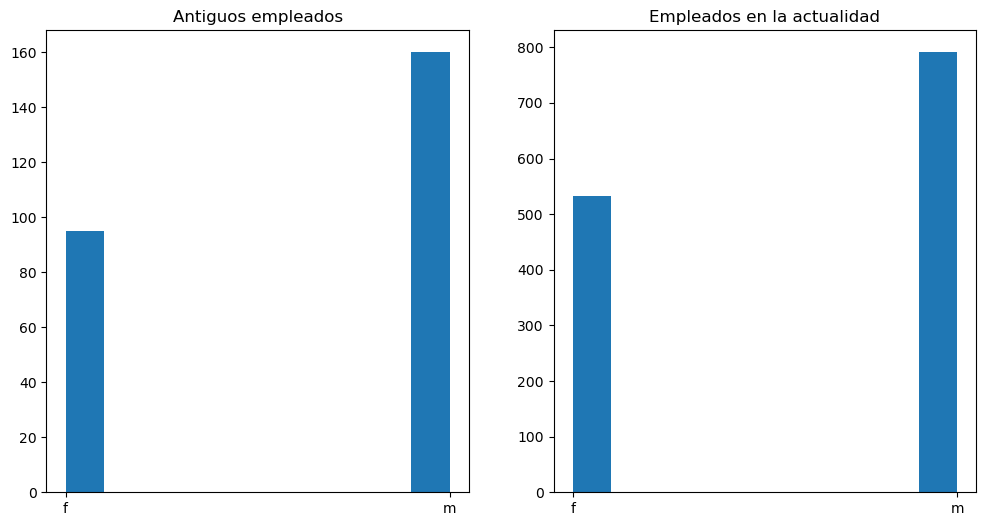

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex = True)


# Histograma para Attrition = True
axes[0].hist(data=df[df['attrition'] == True], x='gender')
axes[0].set_title('Antiguos empleados')

# Histograma para Attrition = False
axes[1].hist(data=df[df['attrition'] == False], x='gender')
axes[1].set_title('Empleados en la actualidad')

In [13]:
t_cont_gender = pd.crosstab(df['attrition'], df['gender'])

t_cont_gender

gender,f,m
attrition,,
False,533,791
True,95,160


In [16]:
chi2, p_value, _, _=chi2_contingency(t_cont_gender)
p_value

0.4082328152702148

p_value es mayor que 0.05 por lo que no podemos rechazar la HO 
NO EXISTE DIFERENCIA ENTRE GRUPOS

¿EXISTE RELACIÓN ENTRE LOS EMPLEADOS QUE SIGUEN EN LA EMPRESA Y SU ESTADO CIVIL?
HO > 0.05 :NO EXISTE UNA DIFERENCIA ENTRE GRUPOS
H1 < 0.05 : EXISTE UNA DIFERENCIA ENTRE GRUPOS

TypeError: 'value' must be an instance of str or bytes, not a float

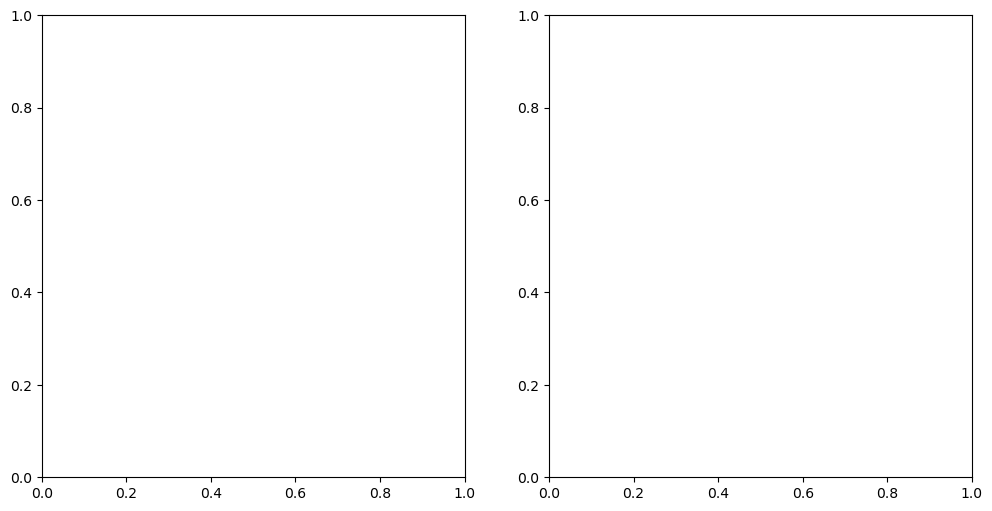

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex = True)


# Histograma para Attrition = True
axes[0].hist(data=df[df['attrition'] == True], x='marital_status')
axes[0].set_title('Antiguos empleados')

# Histograma para Attrition = False
axes[1].hist(data=df[df['attrition'] == False], x='marital_status')
axes[1].set_title('Empleados en la actualidad')

In [35]:
 df['marital_status'].value_counts()

marital_status
married     425
single      318
divorced    196
Name: count, dtype: int64

In [19]:
t_cont_marital = pd.crosstab(df['attrition'], df['marital_status'])

t_cont_marital

marital_status,divorced,married,single
attrition,,,
False,177,367,236
True,19,58,82


In [20]:
chi2, p_value, _, _=chi2_contingency(t_cont_marital)
p_value

7.211261864983175e-07

p_value es menor que 0.05 por lo que podemos rechazar la HO 
EXISTE DIFERENCIA ENTRE GRUPOS

In [ ]:
#a esta altura me he dado cuenta de que son 3 grupos no dos

    - years since las promotion (numerico)
    - monthly_income (numérico)

¿EXISTE RELACIÓN ENTRE LOS EMPLEADOS QUE SIGUEN EN LA EMPRESA Y SU SALARIO?
HO > 0.05 :NO EXISTE UNA DIFERENCIA ENTRE GRUPOS
H1 < 0.05 : EXISTE UNA DIFERENCIA ENTRE GRUPOS

<Axes: xlabel='employee_number', ylabel='monthly_income'>

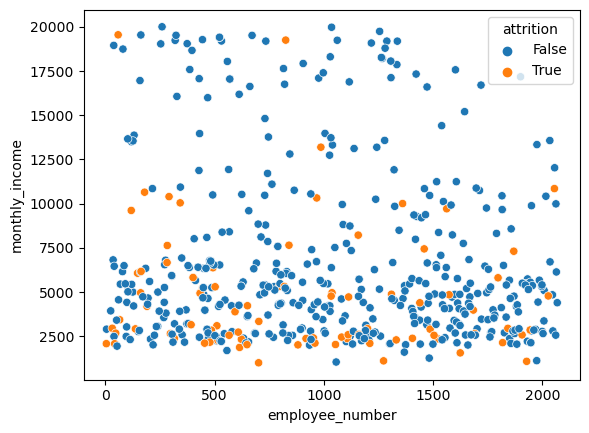

In [43]:
sns.scatterplot(data=df, x='employee_number', y= 'monthly_income', hue = 'attrition')

la mayoria de los trabajadores están en los sueltos bajos pero a primera vista parece que los que se han marchado (los naranjas) lo están en mayor proporción

In [47]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [48]:
normalidad(df,'monthly_income')

Para la columna monthly_income los datos siguen una distribución normal.


In [49]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")


In [50]:
homogeneidad(df,'attrition','monthly_income')

Para la métrica monthly_income, las varianzas no son homogéneas entre grupos.


al no ser homogeneas usaremos el test de mann whitney

In [56]:

income_current_employees = df[df['attrition'] == False]['monthly_income']
income_former_employees = df[df['attrition'] == True]['monthly_income']

In [59]:
statistic, p_value = stats.mannwhitneyu(income_current_employees, income_former_employees)
p_value

nan